In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Data Preprocessing: Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.

In [2]:
# Load dataset
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalization of image pixel values
# (Converting all pixel values between 0-1 to reduce numbers representation)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# Reshape data to match input format for the neural network
x_train = x_train.reshape(-1, 28, 28, 1) #28=28*28 pixel data, 1=no. of channel
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# One-hot encoding of labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
## Data Agumentation-Creating Sunthetic data where data or dimnesion is less to avoid underfitting
data_agumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

# Model Development: Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.

In [7]:
# Create a neural network model
def create_model():
    model = models.Sequential([layers.Input(shape = (28,28,1)),
            data_agumentation,
                              
            # First Convolutional Layer                   
            layers.Conv2D(32, (3,3), activation = 'relu'),
            layers.BatchNormalization(),
            layers.MaxPool2D((2,2)),
            
            # Flatten the input from the convolutional layer to a single dimension
            layers.Flatten(),
                              
            # Add a dense (fully connected) layer with ReLU activation
            layers.Dense(128, activation = 'relu'),
            layers.Dropout(0.5),
                              
            # Output layer with 10 units (one for each digit) and softmax activation
            layers.Dense(10, activation = 'softmax')])
    
    return model

# Training: Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.

In [8]:
## Compile Model
model = create_model()
model.compile(optimizer = 'sgd' , loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
## Callbacks before fit the model in any model --> Purpose is to save time 
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True) 
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

In [10]:
## Train Model
history = model.fit(x_train, y_train, epochs = 30, validation_split = 0.1, callbacks =[early_stopping, reduce_lr])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7542 - loss: 0.7567 - val_accuracy: 0.9740 - val_loss: 0.0915 - learning_rate: 0.0100
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9214 - loss: 0.2639 - val_accuracy: 0.9753 - val_loss: 0.0842 - learning_rate: 0.0100
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9400 - loss: 0.1945 - val_accuracy: 0.9792 - val_loss: 0.0769 - learning_rate: 0.0100
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9464 - loss: 0.1768 - val_accuracy: 0.9838 - val_loss: 0.0663 - learning_rate: 0.0100
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9529 - loss: 0.1552 - val_accuracy: 0.9832 - val_loss: 0.0624 - learning_rate: 0.0100
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9560 - loss: 0.1447 - val_accuracy: 0.9822 - val_loss: 0.0622 - learning_rate: 0.0100
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accura

# Evaluation: Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.

In [11]:
# Evaluate the performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0570
Test Accuracy : 0.986299991607666


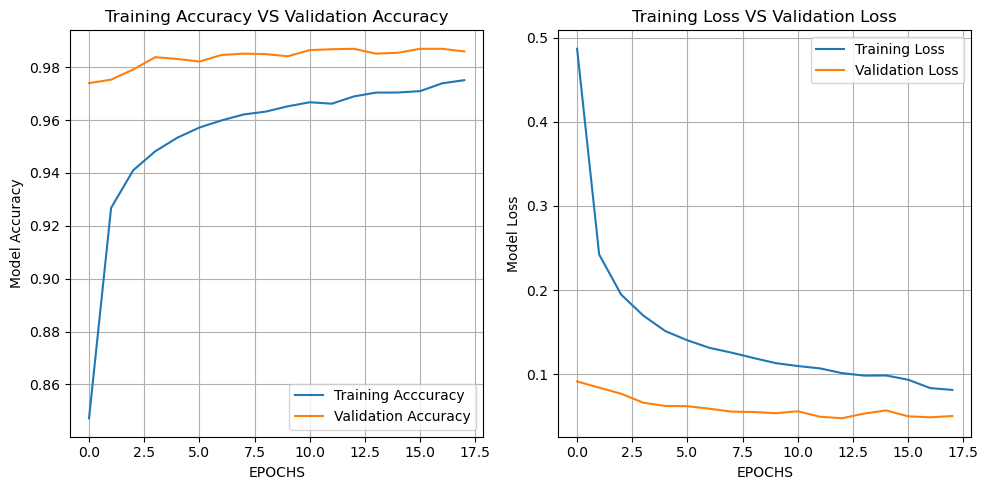

In [20]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Acccuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training Accuracy VS Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Model Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss VS Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('Model Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
def predict_digit(image):
    image = image.reshape(1,28,28,1)
    prediction = model.predict(image)
    return np.argmax(prediction)

print(f'predict_digit: {predict_digit(x_test[15])}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predict_digit: 5
